In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv('employee_reviews.csv')

In [3]:
data.head()

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


In [4]:
del data['Unnamed: 0']

In [5]:
data.isnull().any()

company                       False
location                      False
dates                         False
job-title                     False
summary                        True
pros                          False
cons                          False
advice-to-mgmt                 True
overall-ratings               False
work-balance-stars            False
culture-values-stars          False
carrer-opportunities-stars    False
comp-benefit-stars            False
senior-mangemnet-stars        False
helpful-count                 False
link                          False
dtype: bool

In [6]:
data=data.fillna(method='ffill')

In [7]:
data.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


In [8]:
data['work-balance-stars']=data['work-balance-stars'].apply(lambda x:x.replace("none","0") if "none" in x else x)
data['work-balance-stars']=data['work-balance-stars'].apply(lambda x:float(x))
data['culture-values-stars']=data['culture-values-stars'].apply(lambda x:x.replace("none","0") if "none" in x else x)
data['culture-values-stars']=data['culture-values-stars'].apply(lambda x:float(x))
data['comp-benefit-stars']=data['comp-benefit-stars'].apply(lambda x:x.replace("none","0") if "none" in x else(x))
data['comp-benefit-stars']=data['comp-benefit-stars'].apply(lambda x:float(x))
data['senior-mangemnet-stars']=data['senior-mangemnet-stars'].apply(lambda x:x.replace("none","0") if "none" in x else(x))
data["senior-mangemnet-stars"]=data['senior-mangemnet-stars'].apply(lambda x:float(x))
data['dates']=data['dates'].apply(lambda x:x.replace("None","Jan 1, 2012") if "None" in x else(x))

In [9]:
data.describe()

,overall-ratings,work-balance-stars,culture-values-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count
count,67529.000000,67529.000000,67529.000000,67529.000000,67529.000000,67529.000000
mean,3.826075,3.015593,3.025308,3.524427,2.939981,1.268211
std,1.154989,1.609086,1.907831,1.561344,1.627537,16.085852
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,3.000000,2.000000,0.000000
50%,4.000000,3.000000,4.000000,4.000000,3.000000,0.000000
75%,5.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,2094.000000


In [10]:
data.median()

overall-ratings           4.0
work-balance-stars        3.0
culture-values-stars      4.0
comp-benefit-stars        4.0
senior-mangemnet-stars    3.0
helpful-count             0.0
dtype: float64

In [11]:
overall=data[['company','overall-ratings','work-balance-stars','culture-values-stars','comp-benefit-stars','senior-mangemnet-stars']].groupby('company').mean()

In [12]:
overall.head()

,overall-ratings,work-balance-stars,culture-values-stars,comp-benefit-stars,senior-mangemnet-stars
company,,,,,
amazon,3.587363,2.692641,2.998260,3.300965,2.792906
apple,3.958224,3.049421,3.281390,3.643398,3.111737
facebook,4.511950,3.831761,4.125157,4.448113,4.151258
google,4.339430,3.332204,3.175214,3.647014,3.173040
microsoft,3.816564,3.254796,2.755326,3.616843,2.821863


/home/raushan/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


<Figure size 720x360 with 0 Axes>

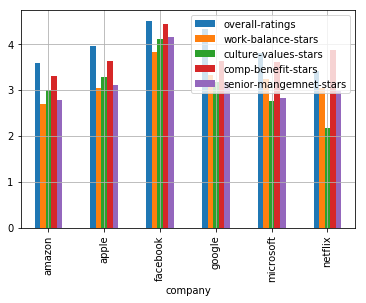

In [13]:
plt.figure(figsize=(10,5))
overall.plot(kind='bar')
plt.grid('True')

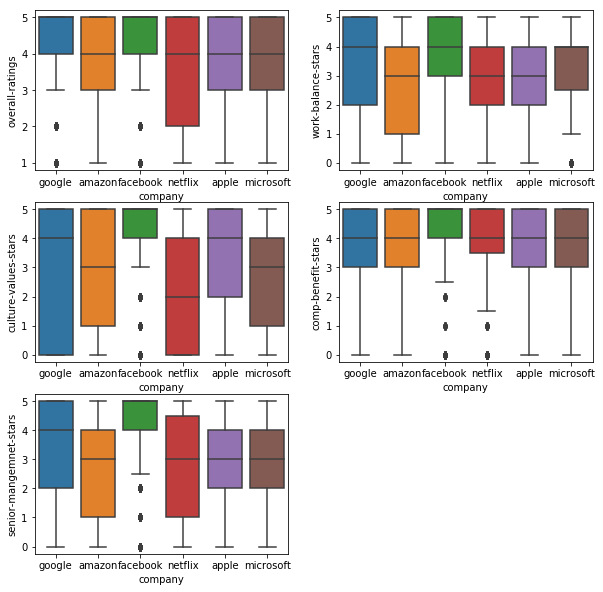

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.boxplot(x=data['company'],y=data['overall-ratings'])
plt.subplot(3,2,2)
sns.boxplot(x=data['company'],y=data['work-balance-stars'])
plt.subplot(3,2,3)
sns.boxplot(x=data['company'],y=data['culture-values-stars'])
plt.subplot(3,2,4)
sns.boxplot(x=data['company'],y=data['comp-benefit-stars'])
plt.subplot(3,2,5)
sns.boxplot(x=data['company'],y=data['senior-mangemnet-stars'])

/home/raushan/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


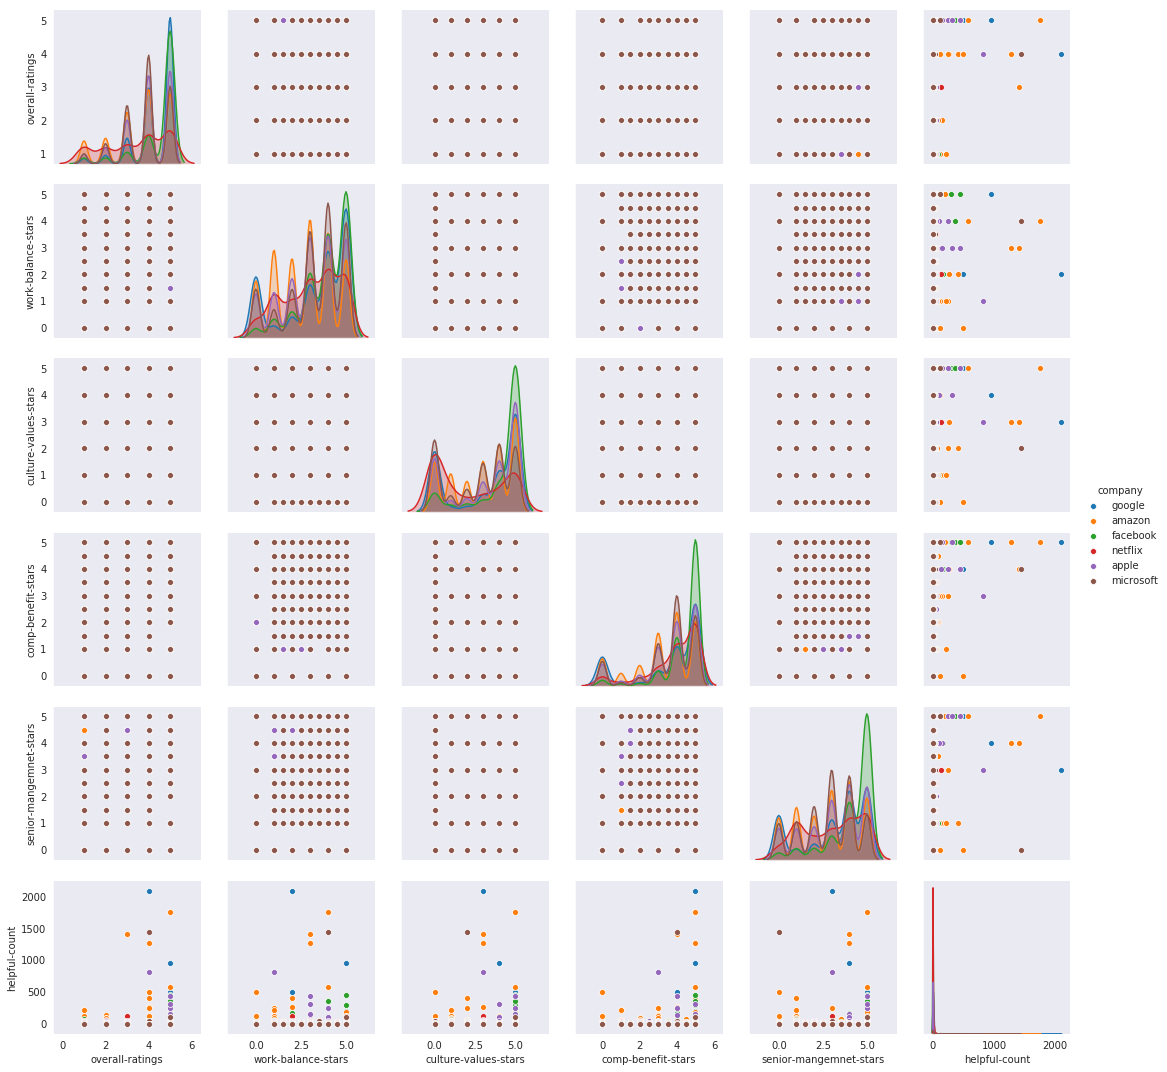

In [28]:
with sns.axes_style("dark"):
    sns.pairplot(data, hue='company', size=2.5,diag_kind='kde');

In [17]:
google=data[(data['company']=='google') & (data['location']=='New York, NY')]

In [18]:
google.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
2,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
6,google,"New York, NY","Dec 11, 2018",Current Employee - Software Engineer,Software engineer,Great working environment. Good work life balance,Usual big company problems. Hierarchy.,none,5.0,5.0,4.0,4.0,5.0,4.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
8,google,"New York, NY","Dec 10, 2018",Current Employee - Anonymous Employee,Google Surpasses Realistic Expectations,Great products. Vision you can feel good about...,Younger employees complaining about the compan...,none,5.0,5.0,5.0,5.0,5.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
20,google,"New York, NY","Nov 26, 2018",Current Employee - Designer,"Great, but great can always be better",Great team and support for individuals,"Lots of bureaucracy, not super diverse",none,5.0,3.0,4.0,3.0,4.0,5.0,2,https://www.glassdoor.com/Reviews/Google-Revie...
37,google,"New York, NY","Dec 6, 2018",Current Employee - Anonymous Employee,Good compensation,Better than average engineers. Competitive com...,Big and beurocratic. Lots of legacy systems. M...,none,4.0,4.0,3.0,3.0,4.0,3.0,0,https://www.glassdoor.com/Reviews/Google-Revie...


In [19]:
google.describe()

,overall-ratings,work-balance-stars,culture-values-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,4.409884,3.873547,3.558140,4.268895,3.598837,4.540698
std,0.882625,1.429846,1.923339,1.276472,1.447466,51.205566
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,3.000000,3.000000,4.000000,3.000000,0.000000
50%,5.000000,4.000000,4.000000,5.000000,4.000000,0.500000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,949.000000


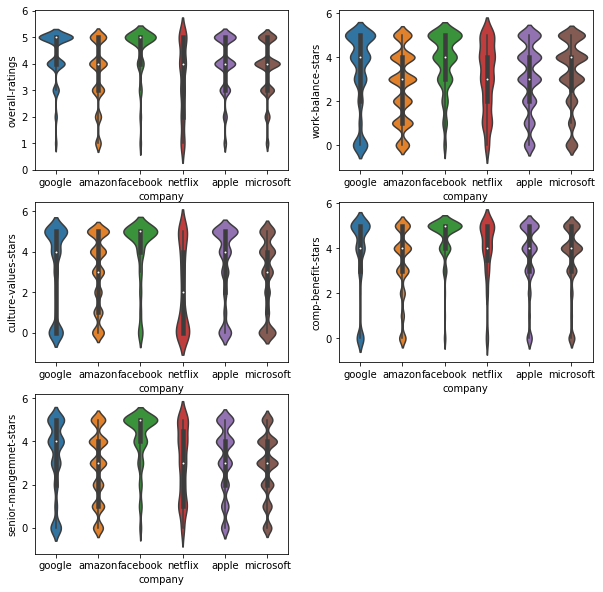

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(3, 2,1 )
sns.violinplot(x=data['company'],y=data['overall-ratings'])
plt.subplot(3,2,2)
sns.violinplot(x=data['company'],y=data['work-balance-stars'])
plt.subplot(3,2,3)
sns.violinplot(x=data['company'],y=data['culture-values-stars'])
plt.subplot(3,2,4)
sns.violinplot(x=data['company'],y=data['comp-benefit-stars'])
plt.subplot(3,2,5)
sns.violinplot(x=data['company'],y=data['senior-mangemnet-stars'])

In [21]:
x=data[(data['overall-ratings']>3.5) & (data['work-balance-stars']>3.5) & (data['culture-values-stars']>3.5)]

In [22]:
x.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
2,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
4,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...
5,google,"Mountain View, CA","Dec 9, 2018",Former Employee - SDE2,NICE working in GOOGLE as an INTERN,"People are not that busy, so they are nice to ...",Food is not good as I expected. People said it...,none,5.0,4.0,4.0,4.0,5.0,4.0,1,https://www.glassdoor.com/Reviews/Google-Revie...
6,google,"New York, NY","Dec 11, 2018",Current Employee - Software Engineer,Software engineer,Great working environment. Good work life balance,Usual big company problems. Hierarchy.,none,5.0,5.0,4.0,4.0,5.0,4.0,0,https://www.glassdoor.com/Reviews/Google-Revie...


No handles with labels found to put in legend.


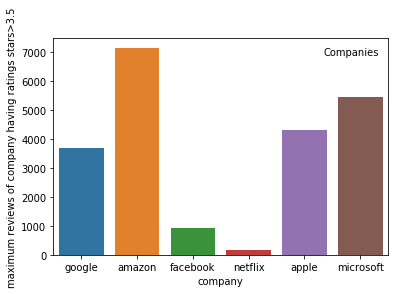

In [23]:
sns.countplot(x=x['company'])
plt.ylabel("maximum reviews of company having ratings stars>3.5")
plt.legend(scatterpoints=1, frameon=False,labelspacing=1, title='Companies')

In [43]:
mean=overall=data[['company','overall-ratings','work-balance-stars','culture-values-stars','comp-benefit-stars','senior-mangemnet-stars']].groupby('company').median()

In [44]:
mean.head()

,overall-ratings,work-balance-stars,culture-values-stars,comp-benefit-stars,senior-mangemnet-stars
company,,,,,
amazon,4.0,3.0,3.0,4.0,3.0
apple,4.0,3.0,4.0,4.0,3.0
facebook,5.0,4.0,5.0,5.0,5.0
google,5.0,4.0,4.0,4.0,4.0
microsoft,4.0,4.0,3.0,4.0,3.0


Text(0, 0.5, 'Median values of all categories')

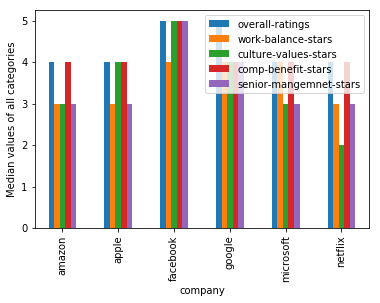

In [46]:
mean.plot(kind='bar')
plt.ylabel("Median values of all categories")

In [47]:
data.loc[data[['overall-ratings','work-balance-stars','culture-values-stars','senior-mangemnet-stars']].idxmax()]

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
2,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
0,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
0,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...


In [51]:
import re
data['pros']=data['pros'].apply(lambda x:)

ValueError: Cannot index with multidimensional key